In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
customers_df=pd.read_csv('Customers.csv')

In [3]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022
...,...,...,...,...
195,C0196,Laura Watts,Europe,07-06-2022
196,C0197,Christina Harvey,Europe,21-03-2023
197,C0198,Rebecca Ray,Europe,27-02-2022
198,C0199,Andrea Jenkins,Europe,03-12-2022


In [4]:
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [5]:
print(type(customers_df['SignupDate'][0]))

<class 'str'>


In [6]:
customers_df['SignupDate']=pd.to_datetime(customers_df['SignupDate'],format='%d-%m-%Y')

In [7]:
customers_df['SignupDays']=(pd.to_datetime('today')-customers_df['SignupDate']).dt.days

In [8]:
customers_df

,CustomerID,CustomerName,Region,SignupDate,SignupDays
0,C0001,Lawrence Carroll,South America,2022-07-10,931
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1078
2,C0003,Michael Rivera,South America,2024-03-07,325
3,C0004,Kathleen Rodriguez,South America,2022-10-09,840
4,C0005,Laura Weber,Asia,2022-08-15,895
...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,964
196,C0197,Christina Harvey,Europe,2023-03-21,677
197,C0198,Rebecca Ray,Europe,2022-02-27,1064
198,C0199,Andrea Jenkins,Europe,2022-12-03,785


In [9]:
transactions_df.loc[transactions_df['CustomerID'].isnull()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [10]:
transaction_agg = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

In [11]:
transaction_agg

,CustomerID,total_spent,total_quantity
0,C0001,3354.52,12
1,C0002,1862.74,10
2,C0003,2725.38,14
3,C0004,5354.88,23
4,C0005,2034.24,7
...,...,...,...
194,C0196,4982.88,12
195,C0197,1928.65,9
196,C0198,931.83,3
197,C0199,1979.28,9


In [12]:
customers_merged=pd.merge(customers_df,transaction_agg,on='CustomerID',how='left')

In [13]:
customers_merged

,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity
0,C0001,Lawrence Carroll,South America,2022-07-10,931,3354.52,12.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1078,1862.74,10.0
2,C0003,Michael Rivera,South America,2024-03-07,325,2725.38,14.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,840,5354.88,23.0
4,C0005,Laura Weber,Asia,2022-08-15,895,2034.24,7.0
...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,964,4982.88,12.0
196,C0197,Christina Harvey,Europe,2023-03-21,677,1928.65,9.0
197,C0198,Rebecca Ray,Europe,2022-02-27,1064,931.83,3.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,785,1979.28,9.0


In [14]:
p_categories=transactions_df.merge(products_df,on='ProductID',how='left')

In [15]:
p_categories

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,24-10-2024 08:30,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,04-06-2024 02:15,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,05-04-2024 13:05,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,29-09-2024 10:16,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86


In [16]:
s=p_categories.groupby('CustomerID')['Category']
for k, v in s:
  print(k)
  print('---'*50)
  print(v)

C0001
------------------------------------------------------------------------------------------------------------------------------------------------------
135          Books
442     Home Decor
546    Electronics
724    Electronics
776    Electronics
Name: Category, dtype: object
C0002
------------------------------------------------------------------------------------------------------------------------------------------------------
96     Home Decor
764    Home Decor
811      Clothing
953      Clothing
Name: Category, dtype: object
C0003
------------------------------------------------------------------------------------------------------------------------------------------------------
373     Home Decor
672     Home Decor
750       Clothing
842    Electronics
Name: Category, dtype: object
C0004
------------------------------------------------------------------------------------------------------------------------------------------------------
37           Books
71      Home Decor
1

In [17]:
category_pref = p_categories.groupby(['CustomerID', 'Category']).size().unstack(fill_value=0)
category_pref

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,1,0,3,1
C0002,0,2,0,2
C0003,0,1,1,2
C0004,3,0,2,3
C0005,0,0,2,1
...,...,...,...,...
C0196,1,1,0,2
C0197,0,0,2,1
C0198,0,1,1,0


In [18]:
customers_merged=pd.merge(customers_merged, category_pref, on='CustomerID', how='left')
customers_merged

,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity,Books,Clothing,Electronics,Home Decor
0,C0001,Lawrence Carroll,South America,2022-07-10,931,3354.52,12.0,1.0,0.0,3.0,1.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1078,1862.74,10.0,0.0,2.0,0.0,2.0
2,C0003,Michael Rivera,South America,2024-03-07,325,2725.38,14.0,0.0,1.0,1.0,2.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,840,5354.88,23.0,3.0,0.0,2.0,3.0
4,C0005,Laura Weber,Asia,2022-08-15,895,2034.24,7.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,964,4982.88,12.0,1.0,1.0,0.0,2.0
196,C0197,Christina Harvey,Europe,2023-03-21,677,1928.65,9.0,0.0,0.0,2.0,1.0
197,C0198,Rebecca Ray,Europe,2022-02-27,1064,931.83,3.0,0.0,1.0,1.0,0.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,785,1979.28,9.0,0.0,0.0,2.0,2.0


In [19]:
#customer_categories=p_categories.groupby('CustomerID')['Category'].apply(lambda x: ', '.join(x)).reset_index()
#customer_categories

In [20]:
customers_merged.isnull().sum()

CustomerID        0
CustomerName      0
Region            0
SignupDate        0
SignupDays        0
total_spent       1
total_quantity    1
Books             1
Clothing          1
Electronics       1
Home Decor        1
dtype: int64

In [21]:
customers_merged.loc[customers_merged['total_spent'].isnull()]
#customers_merged.fillna(0,inplace=True)


,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity,Books,Clothing,Electronics,Home Decor
179,C0180,Amy Carpenter,Asia,2023-10-25,459,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
customers_merged.loc[customers_merged['total_quantity'].isnull()]


,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity,Books,Clothing,Electronics,Home Decor
179,C0180,Amy Carpenter,Asia,2023-10-25,459,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
customers_merged.fillna(0,inplace=True)

second approach

In [27]:
numerical_features = ['SignupDays', 'total_spent', 'total_quantity']
categorical_features = ['Region']
category_columns = list(category_pref.columns)

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  
)

In [30]:
features_to_exclude = ['CustomerID', 'CustomerName', 'SignupDate']
columns_to_use = [col for col in customers_merged.columns if col not in features_to_exclude]

processed_features = preprocessor.fit_transform(customers_merged[columns_to_use])

pca=PCA()
pca.fit(processed_features)


PCA()

In [31]:
explained_variance_ratio = pca.explained_variance_ratio_

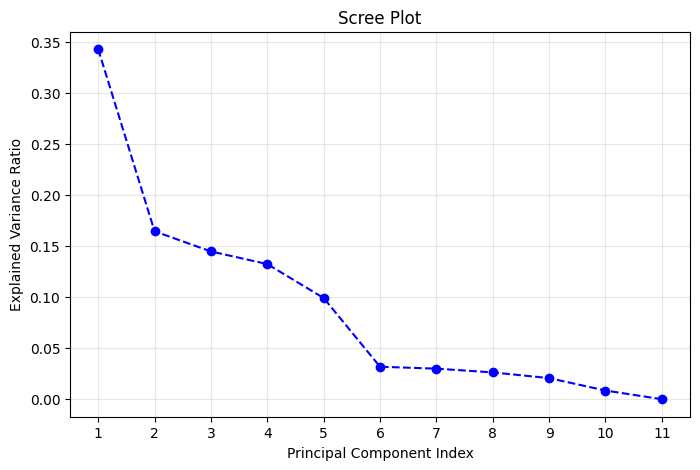

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(alpha=0.3)
plt.show()

In [33]:
opt_pca=PCA(n_components=6)
reduced_features=opt_pca.fit_transform(processed_features)

In [34]:
similarity_matrix = cosine_similarity(reduced_features)

In [35]:
similarity_matrix

array([[ 1.        , -0.16045186, -0.07852759, ...,  0.29334143,
         0.57762105, -0.3666692 ],
       [-0.16045186,  1.        ,  0.2791497 , ...,  0.60679903,
         0.3738839 ,  0.25820181],
       [-0.07852759,  0.2791497 ,  1.        , ..., -0.01921322,
         0.37050151,  0.02600786],
       ...,
       [ 0.29334143,  0.60679903, -0.01921322, ...,  1.        ,
         0.54045058, -0.22315241],
       [ 0.57762105,  0.3738839 ,  0.37050151, ...,  0.54045058,
         1.        , -0.52300089],
       [-0.3666692 ,  0.25820181,  0.02600786, ..., -0.22315241,
        -0.52300089,  1.        ]])

In [37]:
for i in range(10):
  similarity_scores=similarity_matrix[i]
  print(similarity_scores.argsort()[-3:])

[111 119   0]
[158 102   1]
[157  30   2]
[103 112   3]
[196   6   4]
[136 186   5]
[196   4   6]
[169  58   7]
[32 57  8]
[ 41 175   9]


In [38]:
top_recomm = {}


for i in range(20):
    customer_id = customers_merged['CustomerID'][i]
    similarity_scores = similarity_matrix[i]

    similarity_scores[i] = 0

    top_3_index = similarity_scores.argsort()[-3:][::-1]
    lookalikes = [(customers_merged['CustomerID'][j], similarity_scores[j]) for j in top_3_index]
    top_recomm[customer_id] = lookalikes

In [70]:
top_recomm

{'C0001': [('C0120', np.float64(0.8389485732212698)),
  ('C0112', np.float64(0.7698542532911528)),
  ('C0091', np.float64(0.7600867839307144))],
 'C0002': [('C0103', np.float64(0.9443992766866213)),
  ('C0159', np.float64(0.9219175247509807)),
  ('C0134', np.float64(0.900027612508594))],
 'C0003': [('C0031', np.float64(0.9556739673202118)),
  ('C0158', np.float64(0.8482826475782203)),
  ('C0195', np.float64(0.8233191846535983))],
 'C0004': [('C0113', np.float64(0.9132784766073142)),
  ('C0104', np.float64(0.848055652127829)),
  ('C0075', np.float64(0.815367837794209))],
 'C0005': [('C0007', np.float64(0.9921371239179828)),
  ('C0197', np.float64(0.9662059287929976)),
  ('C0199', np.float64(0.9013388180619664))],
 'C0006': [('C0187', np.float64(0.8640002883999817)),
  ('C0137', np.float64(0.7897440451514692)),
  ('C0126', np.float64(0.6516763867870745))],
 'C0007': [('C0005', np.float64(0.9921371239179828)),
  ('C0197', np.float64(0.9376301170994077)),
  ('C0199', np.float64(0.897045898

In [39]:
customers_merged[customers_merged['CustomerID']=='C0001']

,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity,Books,Clothing,Electronics,Home Decor
0,C0001,Lawrence Carroll,South America,2022-07-10,931,3354.52,12.0,1.0,0.0,3.0,1.0


In [40]:
customers_merged[customers_merged['CustomerID']=='C0120']

,CustomerID,CustomerName,Region,SignupDate,SignupDays,total_spent,total_quantity,Books,Clothing,Electronics,Home Decor
119,C0120,Francisco Diaz,South America,2023-01-13,744,2470.02,9.0,0.0,0.0,3.0,0.0


In [41]:
lookalike_sheet=[]
for customer_id,lookalikes in top_recomm.items():
  row=[customer_id]
  for ele in lookalikes:
    row.append(ele[0])
    row.append(ele[1])
  lookalike_sheet.append(row)
  

In [42]:
df_lookalike=pd.DataFrame(lookalike_sheet,columns=['customer_id','l_cid_1','score_1','l_cid_2','score_2','l_cid_3','score_3'])
df_lookalike.to_csv('Lookalike.csv',index=False)
